In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the file name
file_name = 'Superstore.csv'

# Check if file exists in the current directory
if not os.path.exists(file_name):
    print(f"Error: The file '{file_name}' was not found in this folder.")
    print(f"Current Working Directory: {os.getcwd()}")
    print("Please make sure the CSV file is saved in this specific folder.")
else:
    print(f"File found. Loading '{file_name}'...")
    
    # Try loading with different encodings
    try:
        df = pd.read_csv(file_name, encoding='windows-1252')
    except UnicodeDecodeError:
        df = pd.read_csv(file_name, encoding='ISO-8859-1')
        
    print("Data loaded successfully!")
    # Show the first 5 rows
    display(df.head())

File found. Loading 'Superstore.csv'...
Data loaded successfully!


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# Check for duplicates
print(f"Duplicate rows before cleaning: {df.duplicated().sum()}")

# Remove duplicates
df.drop_duplicates(inplace=True)
print(f"Duplicate rows after cleaning: {df.duplicated().sum()}")

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

Duplicate rows before cleaning: 0
Duplicate rows after cleaning: 0

Missing Values per Column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [7]:
# Display basic statistics for numerical columns
print("Statistical Summary:")
display(df[['Sales', 'Quantity', 'Profit', 'Discount']].describe())

Statistical Summary:


,Sales,Quantity,Profit,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,28.656896,0.156203
std,623.245101,2.225110,234.260108,0.206452
min,0.444000,1.000000,-6599.978000,0.000000
25%,17.280000,2.000000,1.728750,0.000000
50%,54.490000,3.000000,8.666500,0.200000
75%,209.940000,5.000000,29.364000,0.200000
max,22638.480000,14.000000,8399.976000,0.800000


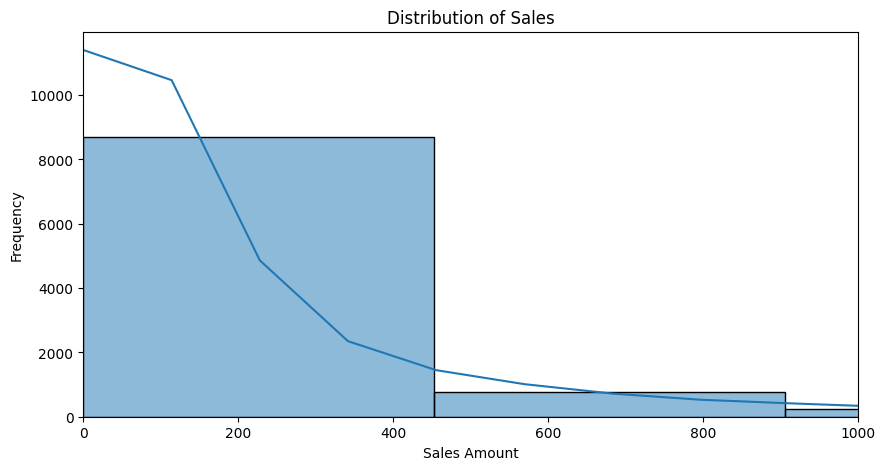

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.xlim(0, 1000) # Limit x-axis to zoom in on common sales
plt.show()

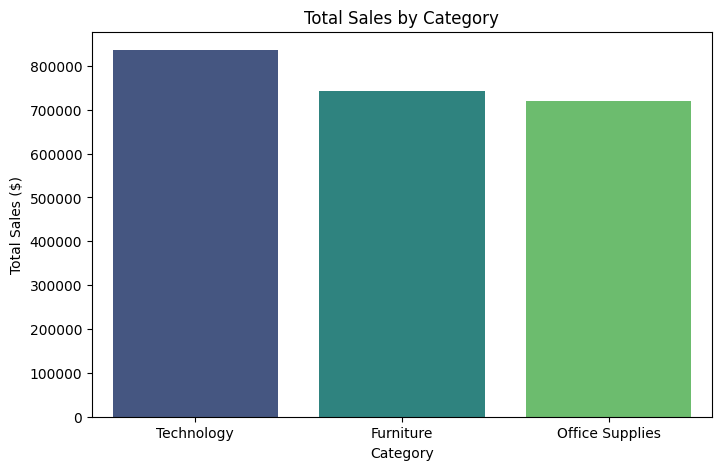

In [15]:
# Calculate total sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
# FIX: Added hue=category_sales.index and legend=False
sns.barplot(
    x=category_sales.index, 
    y=category_sales.values, 
    hue=category_sales.index, 
    legend=False, 
    palette='viridis'
)
plt.title('Total Sales by Category')
plt.ylabel('Total Sales ($)')
plt.show()

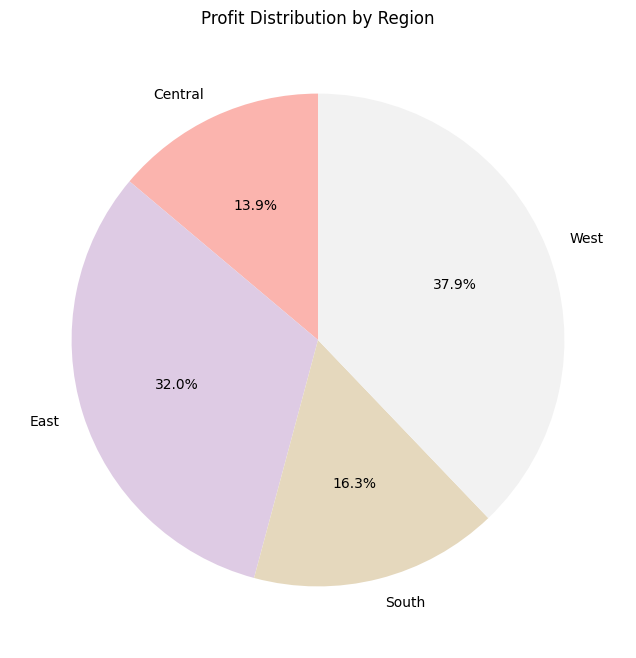

In [10]:
# Calculate total profit by Region
region_profit = df.groupby('Region')['Profit'].sum()

# Plot Pie Chart
plt.figure(figsize=(8, 8))
region_profit.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.title('Profit Distribution by Region')
plt.ylabel('') # Remove y-label for cleaner look
plt.show()

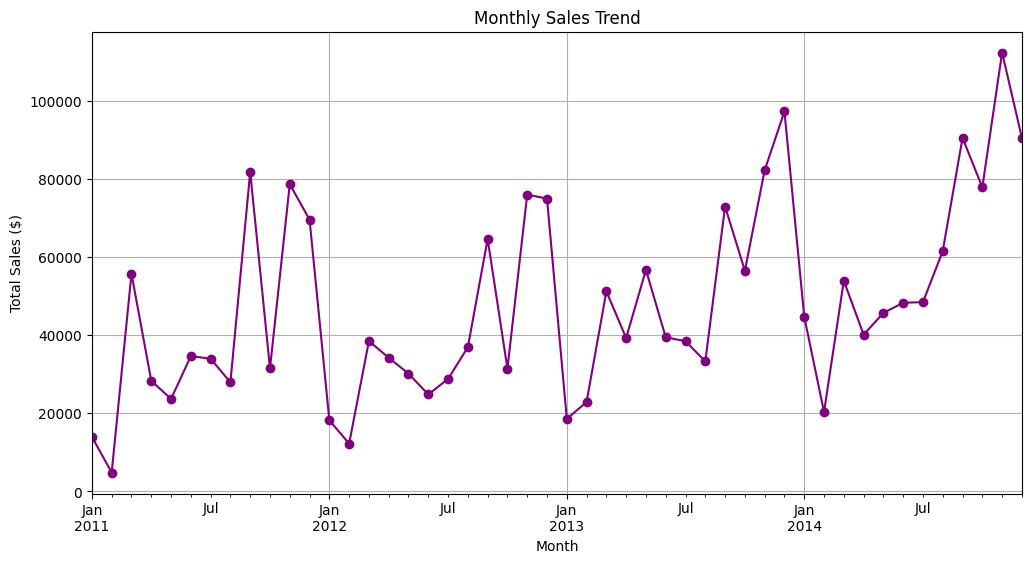

In [11]:
# Extract Month and Year
df['Month'] = df['Order Date'].dt.to_period('M')

# Group sales by Month
monthly_trend = df.groupby('Month')['Sales'].sum()

# Plot Line Chart
plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

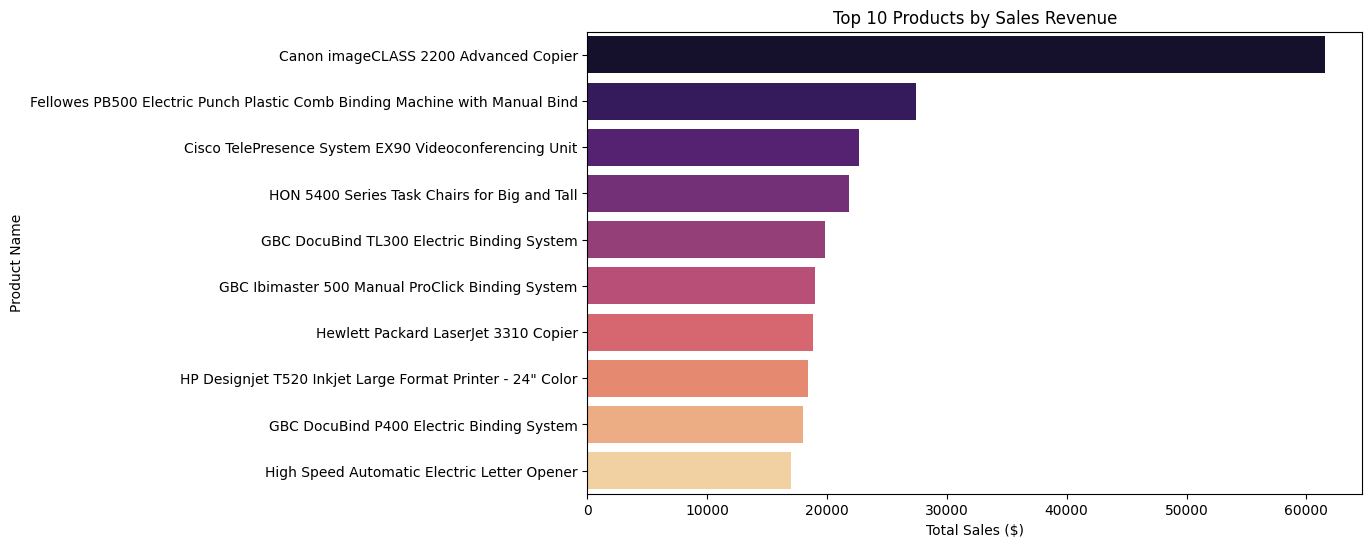

In [16]:
# Find top 10 products by Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
# FIX: Added hue=top_products.index and legend=False
sns.barplot(
    y=top_products.index, 
    x=top_products.values, 
    hue=top_products.index, 
    legend=False, 
    palette='magma'
)
plt.title('Top 10 Products by Sales Revenue')
plt.xlabel('Total Sales ($)')
plt.show()